In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("./sample_data/california_housing_train.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.7, random_state=0)

arvore = DecisionTreeRegressor()
arvore.fit(Xtr, ytr)

predicted_values = arvore.predict(Xval)

np.sqrt(mean_squared_error(yval, predicted_values))

77246.68939877732

[Text(0.6818564204018119, 0.9833333333333333, 'X[7] <= 5.039\nsquared_error = 13667637200.903\nsamples = 5100\nvalue = 209005.344'),
 Text(0.42664694179392026, 0.95, 'X[7] <= 2.972\nsquared_error = 8541347597.752\nsamples = 3984\nvalue = 174187.965'),
 Text(0.15068290858009004, 0.9166666666666666, 'X[1] <= 34.645\nsquared_error = 5397293799.024\nsamples = 1716\nvalue = 130616.962'),
 Text(0.06439337111319964, 0.8833333333333333, 'X[0] <= -118.295\nsquared_error = 5270817151.712\nsamples = 834\nvalue = 154079.624'),
 Text(0.023657994407886507, 0.85, 'X[2] <= 42.5\nsquared_error = 8167632275.871\nsamples = 166\nvalue = 213831.946'),
 Text(0.015076891560537443, 0.8166666666666667, 'X[5] <= 3382.0\nsquared_error = 8333365449.727\nsamples = 130\nvalue = 227307.715'),
 Text(0.004682769534866265, 0.7833333333333333, 'X[5] <= 710.5\nsquared_error = 7778656459.864\nsamples = 118\nvalue = 220188.161'),
 Text(0.001351114669602422, 0.75, 'X[3] <= 1697.5\nsquared_error = 10904898800.104\nsamples = 

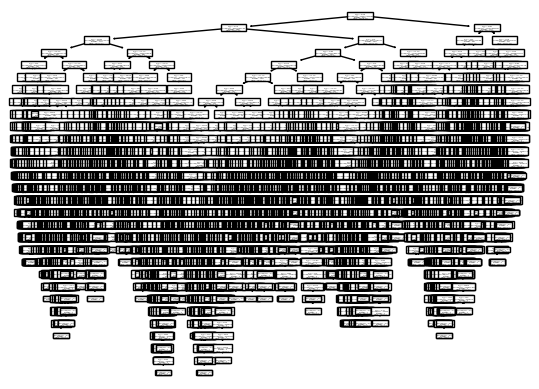

In [28]:
"""
Quanto mais profunda for a árvore de decisão, maior é a chance de overfitting
    --> Vai tentar achar o split em uma feature que reduza mais a impureza dos nós

1. Para cada feature, a árvore vai explorar o melhor ponto de corte, exemplo:
    * feature = área dos quartos
    * area < 1000
    * pureza?
    * area < 500
    * pureza?
    
2. A árvore vai testando as purezas dos nós até chegar em nós que possuem apenas um exemplo, causando overfitting


"""

# plot_tree(arvore)

### Como evitar o overfitting?
* Limitar a profundidade da árvore

In [40]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.7, random_state=0)

# max_depth -> Parâmetro que define a profundidade da árvore
arvore = DecisionTreeRegressor(max_depth=3)
arvore.fit(Xtr, ytr)

predicted_values = arvore.predict(Xval)

np.sqrt(mean_squared_error(yval, predicted_values))

81887.15436009556

In [55]:
def calcula_erro_arvore_depth(depth):
    
    
    # max_depth -> Parâmetro que define a profundidade da árvore
    arvore = DecisionTreeRegressor(max_depth=depth, random_state=0)
    arvore.fit(Xtr, ytr)

    predicted_values = arvore.predict(Xval)

    erro = np.sqrt(mean_squared_error(yval, predicted_values))
    
    print(f"max_depth: {depth} --> Erro: {erro}")

In [57]:
for i in range(1, 15):
    calcula_erro_arvore_depth(i)

max_depth: 1 --> Erro: 95813.23370301379
max_depth: 2 --> Erro: 85906.18661947413
max_depth: 3 --> Erro: 81887.15436009556
max_depth: 4 --> Erro: 77909.8297465707
max_depth: 5 --> Erro: 75490.32192107427
max_depth: 6 --> Erro: 73632.87853726756
max_depth: 7 --> Erro: 71327.50641016725
max_depth: 8 --> Erro: 71523.85971191664
max_depth: 9 --> Erro: 70857.51547181397
max_depth: 10 --> Erro: 70365.83080797389
max_depth: 11 --> Erro: 70613.0440603065
max_depth: 12 --> Erro: 72840.50484641353
max_depth: 13 --> Erro: 72437.12165608525
max_depth: 14 --> Erro: 73906.80365635779


In [66]:
def calcula_erro_arvore_msl(leafs):
    
    
    # min_samples_leaf -> Estou especificando quantas casas eu quero em cada nó, ou seja, é o n° de exemplos no nó final
    arvore = DecisionTreeRegressor(min_samples_leaf=leafs, random_state=0)
    arvore.fit(Xtr, ytr)

    predicted_values = arvore.predict(Xval)

    erro = np.sqrt(mean_squared_error(yval, predicted_values))
    
    print(f"leafs: {leafs} --> Erro: {erro}")

In [67]:
for i in range(1, 15):
    calcula_erro_arvore_msl(i)

leafs: 1 --> Erro: 78110.63590280297
leafs: 2 --> Erro: 73937.24555686432
leafs: 3 --> Erro: 72460.13713346607
leafs: 4 --> Erro: 69839.5048044878
leafs: 5 --> Erro: 68603.83682390756
leafs: 6 --> Erro: 67723.17954826352
leafs: 7 --> Erro: 67333.8630917246
leafs: 8 --> Erro: 66551.66412402596
leafs: 9 --> Erro: 66752.28795141118
leafs: 10 --> Erro: 66771.04762457004
leafs: 11 --> Erro: 66615.51953814317
leafs: 12 --> Erro: 66590.94587971523
leafs: 13 --> Erro: 66590.15453647774
leafs: 14 --> Erro: 66600.03828849187


[Text(0.5, 0.875, 'median_income <= 5.039\nsquared_error = 13667637200.903\nsamples = 5100\nvalue = 209005.344'),
 Text(0.25, 0.625, 'median_income <= 2.972\nsquared_error = 8541347597.752\nsamples = 3984\nvalue = 174187.965'),
 Text(0.125, 0.375, 'latitude <= 34.645\nsquared_error = 5397293799.024\nsamples = 1716\nvalue = 130616.962'),
 Text(0.0625, 0.125, 'squared_error = 5270817151.712\nsamples = 834\nvalue = 154079.624'),
 Text(0.1875, 0.125, 'squared_error = 4504140909.95\nsamples = 882\nvalue = 108431.179'),
 Text(0.375, 0.375, 'housing_median_age <= 47.5\nsquared_error = 8397016997.361\nsamples = 2268\nvalue = 207154.386'),
 Text(0.3125, 0.125, 'squared_error = 7342353822.729\nsamples = 2059\nvalue = 199260.775'),
 Text(0.4375, 0.125, 'squared_error = 12125925606.093\nsamples = 209\nvalue = 284919.679'),
 Text(0.75, 0.625, 'median_income <= 6.581\nsquared_error = 12191265603.457\nsamples = 1116\nvalue = 333299.642'),
 Text(0.625, 0.375, 'housing_median_age <= 36.5\nsquared_error

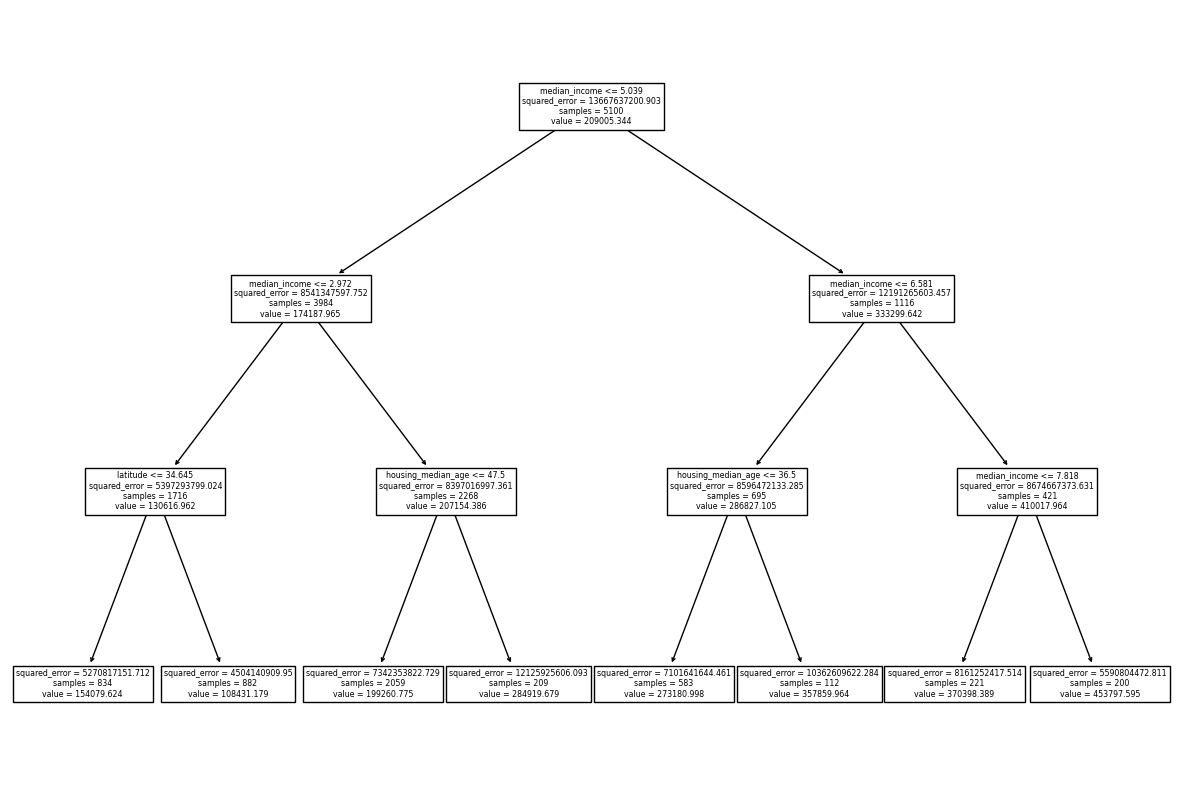

In [44]:
# plt.figure(figsize=(15,10))
# plot_tree(arvore, feature_names=Xtr.columns)